## 1. Variable Identification

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
%matplotlib inline
from IPython.display import display
df = pd.read_csv('../data.csv')
pd.options.display.max_columns = None

In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
df.shape

In [ ]:
df.columns

## 2. Uni-variate Variable Analysis

In [ ]:
del df['id']
del df['diagnosis']
del df['Unnamed: 32']
stats = df.describe()
stats

In [ ]:
# Calculating the percentage difference between 50th percentile and mean
mean = stats.iloc[1, :]
fifty = stats.iloc[5, :]

percentage_off = abs(fifty - mean) / fifty
percentage_off * 100

In [ ]:
# Calculating percentage difference between max 75th percentile and max.

svty_fv = stats.iloc[6, :]
maximum = stats.iloc[7, :]

percentage_off_1 = abs(maximum - svty_fv) / svty_fv
a = list(percentage_off_1 * 100)
sorted = a.sort(reverse=True)
a

In [ ]:
percentage_off_1 * 100

In [ ]:
l = df.columns.values
l.shape

for _ in range(3):
    fig, axes = plt.subplots(2, 5, figsize=(10, 10), sharey=True)
    for i in range(2):
        for j in range(5):
            sns.histplot(df[l[(10*_)+(5*i)+(j)]],kde=True, ax=axes[i, j])
            

    plt.show()




## 3. Bivariate Analysis

In [ ]:
df.corr()

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cmap='Blues',annot=False)

In [ ]:
#Quality correlation matrix
k = 10 #number of variables for heatmap
cols = df.corr().nlargest(k, 'radius_mean')['radius_mean'].index
cm = df[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

### This correlation matrix will show the top k features that are correlated with one feature, ordered from most correlated (top) to kth most correlated (bottom)

In [ ]:
# Calculate the top k ranked correlation matrix for each feature

k = 8
for feature in l:
    cols = df.corr().nlargest(k, feature)[feature].index
    cm = df[cols].corr()
    plt.figure(figsize=(10,6))
    sns.heatmap(cm, annot=True, cmap = 'viridis')
    plt.show()
    

## 4. Missing Value Treatment

In [ ]:
# Check for missing values

df.info()


## 5. Outlier Detection and Removal 

### Z-Score

In [ ]:
from scipy import stats
z = np.abs(stats.zscore(df))
threshold = 3
print(np.where(z>3))

In [ ]:
df = df[(z < 3).all(axis=1)]

In [ ]:
df.shape

####  This shows that using z-score, 74 examples were outliers.

In [ ]:
df.isnull().values.any()

## 6. Categorical Feature Encoding

In [ ]:
df = pd.read_csv('../data.csv')
del df['Unnamed: 32']
df.head()

In [ ]:
le = LabelEncoder()
le.fit(df['diagnosis'])

In [ ]:
list(le.classes_)
y = le.transform(df['diagnosis'])
y

### 1 is mapped to M, and 0 to B.

In [ ]:
# del df['diagnosis']
# df.insert(1, 'diagnosis', y, True)

## 7. Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split
x = pd.read_csv('../data.csv')
del x['Unnamed: 32']
del x['diagnosis']
del x['id']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 4)

## 8. Standardisation / Normalisation

In [ ]:
df = pd.read_csv('../data.csv')
del df['Unnamed: 32']
del df['diagnosis']
del df['id']

# Standardisation - Standard Scaler sklearn
sc_X = StandardScaler()
sc_X = sc_X.fit_transform(df)
#Convert to table format - StandardScaler 
sc_X = pd.DataFrame(data=sc_X, columns=df.columns)

sc_X.describe()


In [ ]:
# Normalisation - Minmax Scaler
scaler = MinMaxScaler()
scaler.fit(df)
scaled_features = scaler.transform(df)
#Convert to table format - MinMaxScaler
df_MinMax = pd.DataFrame(data=scaled_features, columns=df.columns)

df_MinMax.describe()

In [ ]:
# Unit vector - Normalize
transformer = Normalizer()
transformer.fit(df)
transformed_features = transformer.transform(df)
df_normalized = pd.DataFrame(data=transformed_features, columns=df.columns)
df_normalized.describe()

### After data splitting, each of these scaling methods would be performed to each partition of data created. Then they would be trained on and afterwards the method that produces the best algorithm would be picked.

## Visualising distribution having split the dataset by diagnosis

In [62]:
df = pd.read_csv('../data.csv')
del df['id']
del df['Unnamed: 32']

In [65]:
m = df.loc[df.diagnosis=='M']

In [67]:
b = df.loc[df.diagnosis=='B']

In [68]:
del m['diagnosis']
del b['diagnosis']

In [69]:
m.head()
b.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
19,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,0.2699,0.7886,2.058,23.560,0.008462,0.014600,0.02387,0.013150,0.01980,0.002300,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
20,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,0.1852,0.7477,1.383,14.670,0.004097,0.018980,0.01698,0.006490,0.01678,0.002425,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
21,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,0.2773,0.9768,1.909,15.700,0.009606,0.014320,0.01985,0.014210,0.02027,0.002968,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
37,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,0.1839,2.3420,1.170,14.160,0.004352,0.004899,0.01343,0.011640,0.02671,0.001777,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
46,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,0.1563,0.9567,1.094,8.205,0.008968,0.016460,0.01588,0.005917,0.02574,0.002582,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409


### Distribution for malignant cases

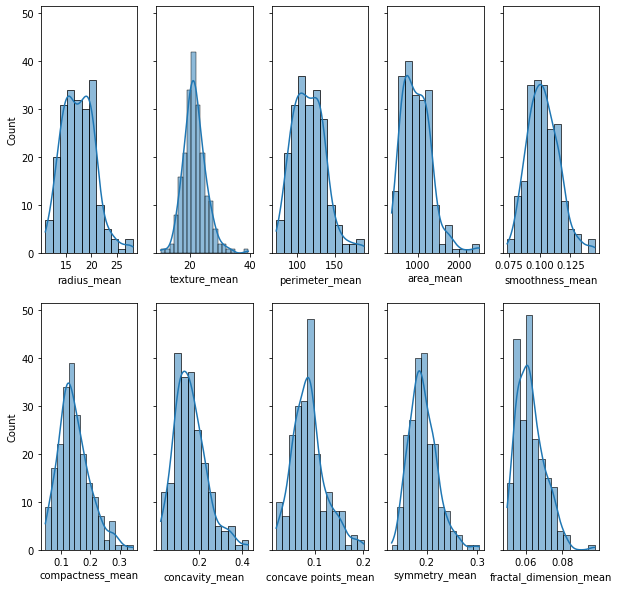

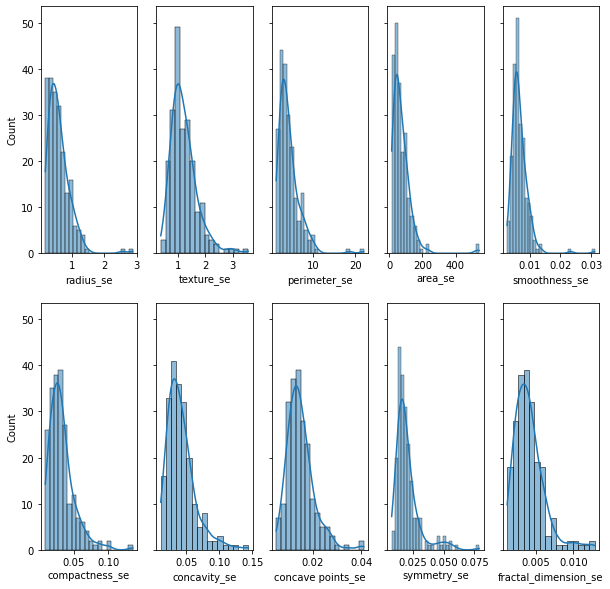

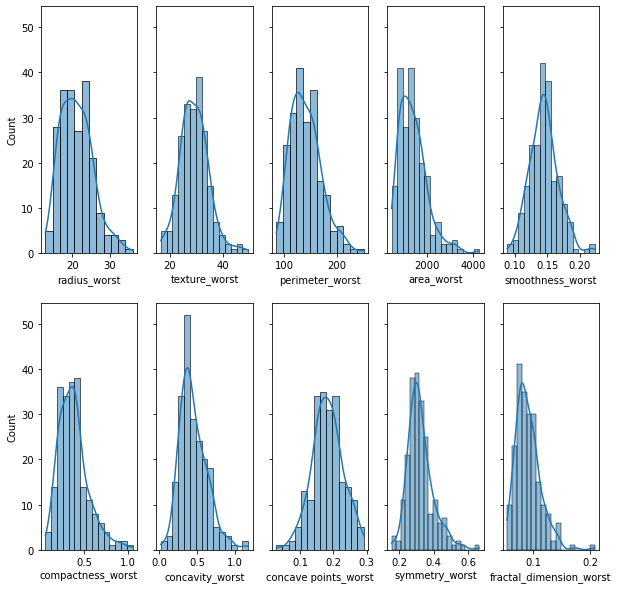

In [71]:
l = m.columns.values
l.shape

for _ in range(3):
    fig, axes = plt.subplots(2, 5, figsize=(10, 10), sharey=True)
    for i in range(2):
        for j in range(5):
            sns.histplot(m[l[(10*_)+(5*i)+(j)]],kde=True, ax=axes[i, j])
            

    plt.show()

### Distribution of benign cases

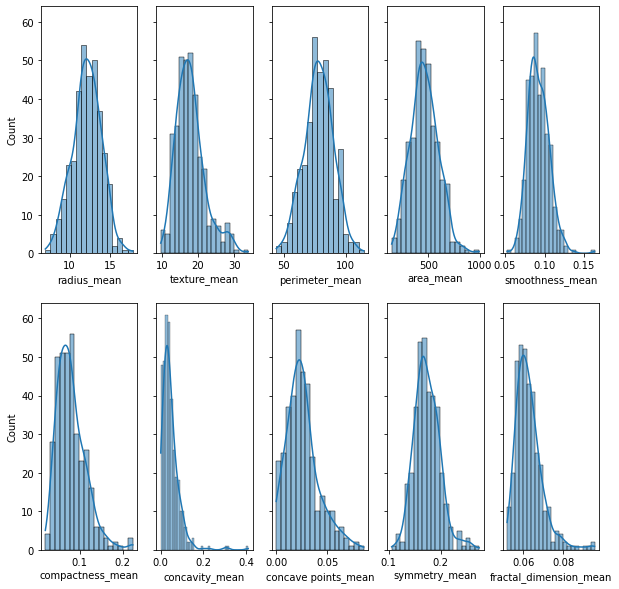

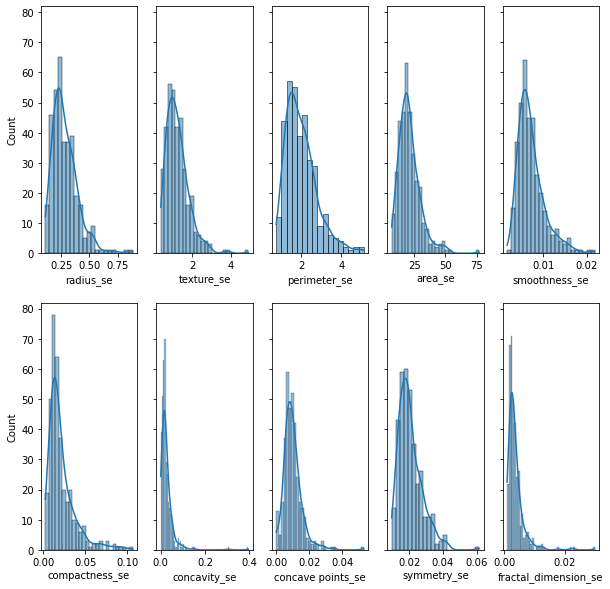

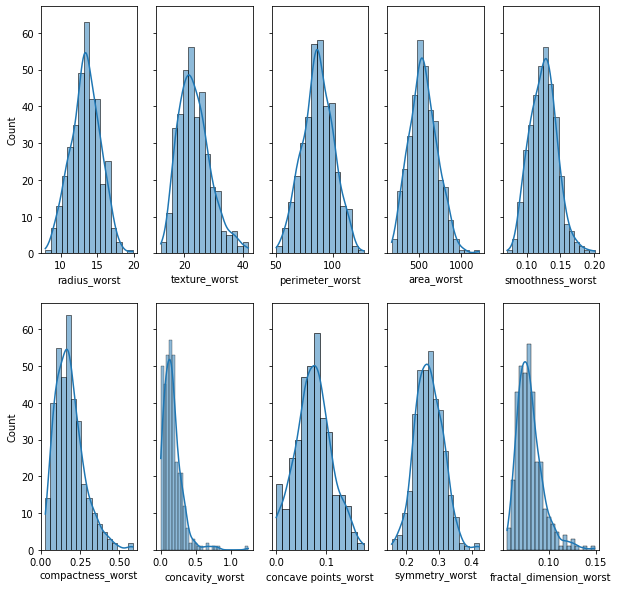

In [72]:
l = b.columns.values
l.shape

for _ in range(3):
    fig, axes = plt.subplots(2, 5, figsize=(10, 10), sharey=True)
    for i in range(2):
        for j in range(5):
            sns.histplot(b[l[(10*_)+(5*i)+(j)]],kde=True, ax=axes[i, j])
            

    plt.show()